In [339]:
# Loading all necessary libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Loading our first dataframe The WeRateDogs Twitter archive containing basic tweet data for all 5000+ of their tweets
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


## 1. Data Gathering

In [213]:
# Accessing the image predictions (using Neural Network) dataset from the Udacity cloud storage
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Creating an image predictions file in the jupyter folder
with open(os.path.join(url.split("/")[-1]), mode='wb') as file:
    file.write(response.content)    
    
# Loading image predictions file into jupyter
image_predictions = pd.read_csv("C:/Users/Jaroslav Tran/Desktop/Analytical Skills/Udacity Data Analyst Nano Degree/P4-DataWrangling\image-predictions.tsv", sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [214]:
# Loading all the necessary keys so we can get access to Twitter´s tweepy API
consumer_key = "eEWrNUOT5Het4lRsXq6ROrIUS"
consumer_secret = "3YzdTsNj1e9tFoXcMVFK0LVBcryERyBF9SA2rsr6KdP6yQhlva"
access_token = "746306268126679040-ikFtTdD3gDA3kImloPE0LaFiCIahc7J"
access_token_secret = "dzSyH7tjAPNSHtPubLLs1p5D44J4DafhCTfNILWlmfscs"

# Accessing the Tweepy API using our keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
    
# Download Tweepy status object based on Tweet ID and store in list
tweets_list = []

# Tweets that can't be found or accessed are saved in the list below:
missing_tweets = []

# Setting the timer to see how long it takes to get all the data
start = time.time()

# Loop through the twitter_archive ids, get the status object/model and append it to the tweets_list
# If there is an error (e.g. we cannot get the status object), append the id to the missing_tweets list
for tweet_id in twitter_archive['tweet_id']:   
    try:
        tweets_list.append(api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json )
    except Exception as e:
        missing_tweets.append(tweet_id)

# Print the time it took to make all the Tweepy API calls
end = time.time()
print(end - start)

Rate limit reached. Sleeping for: 561
Rate limit reached. Sleeping for: 328


2335.3948888778687


In [216]:
print("Number of tweets" ,len(tweets_list))
print("Number of tweets not found" , len(missing_tweets))

Number of tweets 2331
Number of tweets not found 25


In [217]:
# Create a list_of_dicts and append every tweet to it from the tweets_list 
list_of_dicts = []
for tweet in tweets_list:
    list_of_dicts.append(tweet)

# We write this list of tweets into a txt file with an indentation:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

In [218]:
# Open the tweet_json.txt file, loop through every status/tweets object and parse tweet_id, whole_tweet, url, favorite_count, etc.
# Append all those information in the right format to the demo_list 
# Create a pandas dataframe tweet_json with all these above mentioned data as columns
demo_list = []

with open('tweet_json.txt', encoding='utf-8') as file:  
    status_data = json.load(file)
    for each_status in status_data:
        tweet_id = each_status['id']
        whole_tweet = each_status['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_status['favorite_count']
        retweet_count = each_status['retweet_count']
        followers_count = each_status['user']['followers_count']
        whole_source = each_status['source']

        retweeted_status = each_status['retweeted_status'] = each_status.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'Retweet'
            url = 'This is a retweet'

        demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'url': url,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count','url',
                                                           'retweeted_status'])

In [219]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,url,retweeted_status
0,892420643555336193,36571,7786,8681275,https://t.co/MgUWQ76dJU,Original tweet
1,892177421306343426,31497,5766,8681275,https://t.co/0Xxu71qeIV,Original tweet
2,891815181378084864,23745,3817,8681275,https://t.co/wUnZnhtVJB,Original tweet
3,891689557279858688,39892,7957,8681275,https://t.co/tD36da7qLQ,Original tweet
4,891327558926688256,38089,8590,8681275,https://t.co/AtUZn91f7f,Original tweet


## 2. Data Assessment

In [220]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [221]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [222]:
twitter_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [223]:
twitter_archive.duplicated().sum()

0

In [224]:
twitter_archive["rating_denominator"].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [225]:
twitter_archive.query("rating_denominator < 10 ")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [226]:
twitter_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [227]:
# Looking at the unique dog names. Some of them are obviously incorrect or misspelt
pd.unique(twitter_archive["name"])

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [228]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [229]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [230]:
image_predictions.duplicated().sum()

0

In [231]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [232]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,url,retweeted_status
0,892420643555336193,36571,7786,8681275,https://t.co/MgUWQ76dJU,Original tweet
1,892177421306343426,31497,5766,8681275,https://t.co/0Xxu71qeIV,Original tweet
2,891815181378084864,23745,3817,8681275,https://t.co/wUnZnhtVJB,Original tweet
3,891689557279858688,39892,7957,8681275,https://t.co/tD36da7qLQ,Original tweet
4,891327558926688256,38089,8590,8681275,https://t.co/AtUZn91f7f,Original tweet


In [233]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
url                 2331 non-null object
retweeted_status    2331 non-null object
dtypes: int64(3), object(3)
memory usage: 109.3+ KB


In [234]:
tweet_json.isnull().sum()

tweet_id            0
favorite_count      0
retweet_count       0
followers_count     0
url                 0
retweeted_status    0
dtype: int64

In [235]:
tweet_json.retweeted_status.value_counts()

Original tweet    2168
Retweet           163 
Name: retweeted_status, dtype: int64

### Data quality issues
##### twitter_archive
<ul>
    <li> It seems that the twitter_archive dataset containts not only the original tweets but also retweets with images. Since we want to analyse only original posts and not retweets, we will have to get rid of the retweets. </li>
    <li> Incorrect datatypes: in_reply_to_status_id and in_reply_to_user_id should be objects(string) not floats. Timestamp should be a date not an object. </li>
    <li> I suspect that the numerators and denominators given might not match the ones in the text. (The ones that are not multiples of 10) </li>
    <li> The rating denominator is an object but should be an integer if we want to do some calculations with it </li>
    <li> Some of the dog names are misspelled or mislabeled so we will have to either convert them into None or read them from the Text column </li> 
</ul>

##### image_predictions
<ul>
    <li> I suspect that there might be consistency issues with the dog breed names (p1, p2, p3)</li>
    <li> All the headers with the names p1, p2, p3 are not very informative so we will be renaming them do prediction1, prediction2,..</li>
</ul> 

##### tweet_json
<ul>
    <li> There are some retweet data in this dataframe so I will have to get rid of them as well</li>
    <li> Tweed id needs to be converted into integer to be able to merge all the datasets together /li>
</ul>    

### Data tidiness issues
##### twitter_archive
<ul>
    <li>There are four stages of a dog rating (doggo, floofer, pupper, puppo) that could fit into one column </li>
    <li> The twitter_archive, json_tweets and image prediction datasets should be merged into one as they are giving information about the same twitter id accounts to adhere to the tidiness principles: 
        <ul>
    <li> Each observation forms a col</li>
    <li> Each observation forms a row</li>
    <li> Each observational unit forms a table</li>
        </ul></li>
</ul>

## 3. Data Cleaning

In [275]:
# Creating df copies
twitter_archive_clean = twitter_archive.copy()
tweet_json_clean = tweet_json.copy()
image_predictions_clean = image_predictions.copy()

### Define
Twitter Archive Issue: It seems that the twitter_archive dataset containts not only the original tweets but also retweets with images. Since we want to analyse only original posts and not retweets, we will have to get rid of the retweets.

Action: We can get rid of retweets by selecting a subset of data with no retweet id. That will leave us only with the original tweets.

### Code

In [276]:
# Selecting only original tweets by selecting rows with no retweet_status_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean["retweeted_status_id"])]

# There is no reason to leave retweeted_status_id, user_id and timestamp there since they contain 0 values so we will drop them
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [277]:
# Dropping the columns we wont need (Retweets containing 0 values)
twitter_archive_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)

### Test

In [278]:
# We got rid of roughly 200 values
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Define
Twitter Archive Issue: A few columns have incorrect datatypes: twitter_id, in_reply_to_status_id and in_reply_to_user_id should be objects(string) not floats. Timestamp should be a date not an object.

Action: Changing datatypes - twitter_id, in_reply_to_status_id and in_reply_to_user_id will be converted into objects(string) Timestamp will be converted into a date

### Code

In [279]:
# Converting in_reply_to_status_id, in_reply_to_user_id to objects
# Converting timestamp to datetime format
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('object')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('object')
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].astype('datetime64')

### Test

In [280]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 254.9+ KB


### Define
Twitter Archive Issue: I suspect that the numerators and denominators given might not match the ones in the text
Action: Parsing the rating score from the text and compare it against the rating_numerator and rating denominator columns (Especially the ones that are outliers)

### Code

In [281]:
# Parse through the twitter_archive text and extract the rating from it and assign it to parsed rating column
twitter_archive_clean['parsed_rating'] = twitter_archive_clean['text'].str.extract('(\d+/\d+)', expand=True)

# Slice the numerator from the parsed rating column and assign it to parsed_num column
twitter_archive_clean["parsed_num"] = twitter_archive_clean['parsed_rating'].str.split('/').str[0]

# Slice the denominator from the parsed rating column and assign it to parsed_den column
twitter_archive_clean['parsed_den'] = twitter_archive_clean['parsed_rating'].str.split('/').str[1]

In [282]:
# Convert both parsed_num and parsed_den to integers so we can compare them to rating_numerator and rating_denominator columns
twitter_archive_clean['parsed_num'] = twitter_archive_clean['parsed_num'].astype(np.int64)
twitter_archive_clean['parsed_den'] = twitter_archive_clean['parsed_den'].astype(np.int64)

In [283]:
# Creating new columns numerators_match and denominators_match telling us whether the numerator and denominator
# in the text matches the ones we were given (if rating_numerator == parsed_num && rating_denominator == parsed_den)
twitter_archive_clean['numerators_match'] = np.where(twitter_archive_clean['rating_numerator'] == twitter_archive_clean['parsed_num'], 'True', 'False')
twitter_archive_clean['denominators_match'] = np.where(twitter_archive_clean['rating_denominator'] == twitter_archive_clean['parsed_den'], 'True', 'False')

### Test

In [284]:
twitter_archive_clean["numerators_match"].value_counts()

True    2175
Name: numerators_match, dtype: int64

In [285]:
twitter_archive_clean["denominators_match"].value_counts()

True    2175
Name: denominators_match, dtype: int64

#### Comments: This one is tricky. Even though my parsing matched all of them as True, there seems to be a few exceptions. We will have to take a look at the dogs with strange denominators as I suspect that there is more than 1 fraction in the text, which is the key assumption behind my parsing and validation

### Define
Twitter Archive Issue: I suspect that the numerators and denominators given might not match the ones in the text 

Action: The coding way above did not work so I will manually inspect outliers with strange denominators (Those that are not multiples of 10)

### Code

In [286]:
# Setup so we can see the whole contents of each cell
pd.set_option('display.max_colwidth', -1)
# Generating tweets with denominators not equal to 10
twitter_archive_clean.query("rating_denominator != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,parsed_rating,parsed_num,parsed_den,numerators_match,denominators_match
313,835246439529840640,8.35246e+17,2.62596e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,None,None,None,960/00,960,0,True,True
342,832088576586297345,8.32088e+17,3.05821e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None,11/15,11,15,True,True
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,84/70,84,70,True,True
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,24/7,24,7,True,True
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,165/150,165,150,True,True
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None,9/11,9,11,True,True
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,None,None,None,None,None,204/170,204,170,True,True
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,4/20,4,20,True,True
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,50/50,50,50,True,True
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,

In [287]:
# Manually rewrite the scores so they match the ones in the text
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 835246439529840640), "rating_numerator"] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 835246439529840640), "rating_denominator"] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), "rating_numerator"] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), "rating_denominator"] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), "rating_numerator"] = 11
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), "rating_denominator"] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), "rating_numerator"] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), "rating_denominator"] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), "rating_numerator"] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), "rating_denominator"] = 10


# Delete twitter ids with no scoring will be deleted
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

### Test

In [288]:
twitter_archive_clean.query("rating_denominator != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,parsed_rating,parsed_num,parsed_den,numerators_match,denominators_match
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,84/70,84,70,True,True
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,165/150,165,150,True,True
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,None,None,None,None,None,204/170,204,170,True,True
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,4/20,4,20,True,True
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None,99/90,99,90,True,True
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,None,None,None,None,None,80/80,80,80,True,True
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,None,None,None,None,None,45/50,45,50,True,True
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,None,None,None,None,None,60/50,60,50,True,True
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,None,None,None,None,44/40,44,40,True,True
1634,684225744407494656,6.84223e+17,4.19698e+09,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,

### Define
Some of the dog names are misspelled or mislabeled so we will have to either convert them into None or read them from the Text column

Action: Even though we are going to miss some dog names, let´s convert those missinterpreted names to None. Doing it manually would take too long and trying to do it via code would require language processing skills that I currently do not posses.

### Code

In [407]:
# All the non named values are lowercase so we will find all the name values with lowercase and replace them with None value
twitter_archive_clean["name"].str.lower() == "None"
twitter_archive_clean["name"].value_counts()

None         776
Charlie      11 
Lucy         11 
Cooper       10 
Oliver       10 
Penny        9  
Tucker       9  
Winston      8  
Lola         8  
Sadie        8  
Daisy        7  
Toby         7  
Koda         6  
Bella        6  
Stanley      6  
Bailey       6  
Jax          6  
Oscar        6  
Bo           6  
Chester      5  
Bentley      5  
Scout        5  
Milo         5  
Louis        5  
Rusty        5  
Leo          5  
Buddy        5  
Dave         5  
Oakley       4  
Scooter      4  
            ..  
Timber       1  
Kyro         1  
Malikai      1  
Alexander    1  
Fletcher     1  
Pherb        1  
Burt         1  
Kial         1  
Zoe          1  
Dunkin       1  
Lulu         1  
Kota         1  
Jett         1  
Jaycob       1  
Sprinkles    1  
Lilly        1  
Canela       1  
Chubbs       1  
Mosby        1  
Boots        1  
Banjo        1  
Emmie        1  
Randall      1  
Aqua         1  
Donny        1  
Meera        1  
Clyde        1  
Tuck         1

### Test

In [409]:
pd.unique(twitter_archive_clean["name"])

array(['None', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Naphaniel', 'Frank', 'Kial', 'Olive', 'Calvin', 'Filup', 'Shaggy',
       'Tedrick', 'George', 'Stu', 'Biden', 'Jockson', 'Jeph', 'Carll',
       'Klevin', 'Keet', 'Fwed', 'Dave', 'Gabe', 'Pipsy', 'Bradlay',
       'Churlie', 'Kenneth', 'Clarence', 'Timison', 'Joshwa', 'Genevieve',
       'Clybe', 'Josep', 'Erik', 'Cleopatricia', 'Otis', 'Jiminy',
       'Alfie', 'Skittles', 'Ron', 'Torque', 'Bisquick', 'Jareld',
       'Rusty', 'Sophie', 'Lugan', 'Christoper', 'Walter', 'Scout',
       'Kreggory', 'Jimothy', 'Phineas', 'Harry', 'Monkey', 'Cash',
       'Nugget', 'Goose', 'Venti', 'Benedict', 'Nelly', 'Dante', 'Penny',
       'Aja', 'Emmy', 'Shadow', 'Jimbo', 'Waffles', 'Derek', 'Mingus',
       'Maya', 'Canela', 'Jeffrey', 'Gerald', 'Ralphus', 'Maisey', 'Zeke',
       'Oliver', 'Ted', 'Bruno', 'Koda', 'Zoey', 'Jax', 'Franklin',
       'Darla', 'Archie', 'Tilly', 'Jim', 'Earl', 'Beau', 'Steven',
       'Jack', 'Dudd

### Define
The rating denominator is an object but should be an integer if we want to do some calculations with it

In [408]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 2091 to 7103
Data columns (total 7 columns):
tweet_id              2170 non-null int64
timestamp             2170 non-null datetime64[ns]
text                  2170 non-null object
rating_numerator      2170 non-null int64
rating_denominator    2170 non-null int64
name                  2170 non-null object
dogs_stage            2170 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 135.6+ KB


### Code

In [293]:
twitter_archive_clean["rating_denominator"] = twitter_archive_clean["rating_denominator"].astype(np.int64)

### Test

In [294]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                 2170 non-null int64
in_reply_to_status_id    74 non-null object
in_reply_to_user_id      74 non-null object
timestamp                2170 non-null datetime64[ns]
source                   2170 non-null object
text                     2170 non-null object
expanded_urls            2116 non-null object
rating_numerator         2170 non-null int64
rating_denominator       2170 non-null int64
name                     2170 non-null object
doggo                    2170 non-null object
floofer                  2170 non-null object
pupper                   2170 non-null object
puppo                    2170 non-null object
parsed_rating            2170 non-null object
parsed_num               2170 non-null int64
parsed_den               2170 non-null int64
numerators_match         2170 non-null object
denominators_match       2170 non-null object
dtypes: datetime64[n

### Define
Image Predictions: Consistency issues with the dog breed names (p1, p2, p3).

Action: Verify whether the dog breed names are consistent across p1, p2, p3. If they are, leave them be. Otherwise, convert them to a consistent breed name basis.

In [295]:
# Taking a look at the Top 10 first predictions to see if there are inconsistencies in the names with other predictions
image_predictions_clean["p1"].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
chow                  44 
Samoyed               43 
toy_poodle            39 
Pomeranian            38 
malamute              30 
Name: p1, dtype: int64

In [296]:
# Taking a look at the Top 10 second predictions to see if there are inconsistencies in the names with other predictions
image_predictions_clean["p2"].value_counts().head(10)

Labrador_retriever          104
golden_retriever            92 
Cardigan                    73 
Chihuahua                   44 
Pomeranian                  42 
Chesapeake_Bay_retriever    41 
French_bulldog              41 
toy_poodle                  37 
cocker_spaniel              34 
Siberian_husky              33 
Name: p2, dtype: int64

In [297]:
# Taking a look at the Top 10 third predictions to see if there are inconsistencies in the names with other predictions
image_predictions_clean["p3"].value_counts().head(10)

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
Staffordshire_bullterrier    32
chow                         32
cocker_spaniel               31
beagle                       31
Name: p3, dtype: int64

### Comments / Revision
Taking a look again and thinking through it, I think that changing the breed names to a consistent format (i.e. all in capitals) might not be the best idea. The p1, p2 and p3 seems to be consistent and since we are not gonna merge image_predictions or analyse it with another dataframe where the breed type consistency might be an issue, I wont be changing the breed names and leave it as it is

### Define
Image Predictions: All the headers with the names p1, p2, p3 are not very informative so we will be renaming them do prediction1, prediction2,..

### Code

In [298]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [299]:
# Renaming all the columns to be more informative. Switching p1, p2, p3 to prediction1, prediction2, prediction3...
image_predictions_clean.rename(columns={"p1": "prediction1", "p1_conf": "prediction1_confidence",
                   "p1_dog": "prediction1_dog",
                   "p2": "prediction2", "p2_conf": "prediction2_confidence",
                   "p2_dog": "prediction2_dog",
                   "p3": "prediction3", "p3_conf": "prediction3_confidence",
                   "p3_dog": "prediction3_dog"}, inplace=True)

### Test

In [300]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_dog           2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_dog           2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define
tweet_json: There are some retweets left so we will filter them out

### Code

In [301]:
tweet_json_clean["retweeted_status"].value_counts()

Original tweet    2168
Retweet           163 
Name: retweeted_status, dtype: int64

In [302]:
# Selecting a subste of rows where retweeted status is not equal to retweet
tweet_json_clean = tweet_json_clean[tweet_json_clean["retweeted_status"] != "Retweet"]

tweet_json_clean.head()

,tweet_id,favorite_count,retweet_count,followers_count,url,retweeted_status
0,892420643555336193,36571,7786,8681275,https://t.co/MgUWQ76dJU,Original tweet
1,892177421306343426,31497,5766,8681275,https://t.co/0Xxu71qeIV,Original tweet
2,891815181378084864,23745,3817,8681275,https://t.co/wUnZnhtVJB,Original tweet
3,891689557279858688,39892,7957,8681275,https://t.co/tD36da7qLQ,Original tweet
4,891327558926688256,38089,8590,8681275,https://t.co/AtUZn91f7f,Original tweet


### Test

In [303]:
# No Retweets left
tweet_json_clean["retweeted_status"].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

In [304]:
# We can get rid of the retweeted_status column now since we wont be needing it anymore
tweet_json_clean.drop('retweeted_status', axis=1, inplace=True)

# No retweeted status column left
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2168 non-null object
favorite_count     2168 non-null int64
retweet_count      2168 non-null int64
followers_count    2168 non-null int64
url                2168 non-null object
dtypes: int64(3), object(2)
memory usage: 101.6+ KB


### Define
Drop all the columns that won´t be needed for the analysis

In [305]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                 2170 non-null int64
in_reply_to_status_id    74 non-null object
in_reply_to_user_id      74 non-null object
timestamp                2170 non-null datetime64[ns]
source                   2170 non-null object
text                     2170 non-null object
expanded_urls            2116 non-null object
rating_numerator         2170 non-null int64
rating_denominator       2170 non-null int64
name                     2170 non-null object
doggo                    2170 non-null object
floofer                  2170 non-null object
pupper                   2170 non-null object
puppo                    2170 non-null object
parsed_rating            2170 non-null object
parsed_num               2170 non-null int64
parsed_den               2170 non-null int64
numerators_match         2170 non-null object
denominators_match       2170 non-null object
dtypes: datetime64[n

### Code

In [306]:
twitter_archive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "source", "parsed_rating", "expanded_urls",
                            "parsed_num", "parsed_den", "numerators_match", "denominators_match"], 
                           axis=1, inplace=True)


### Test

In [307]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2170 non-null int64
timestamp             2170 non-null datetime64[ns]
text                  2170 non-null object
rating_numerator      2170 non-null int64
rating_denominator    2170 non-null int64
name                  2170 non-null object
doggo                 2170 non-null object
floofer               2170 non-null object
pupper                2170 non-null object
puppo                 2170 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.5+ KB


## Data Tiding

### Define
Twitter archive: There are four stages of a dog rating (doggo, floofer, pupper, puppo) that could fit into one column


### Code

In [308]:
# Using melt to convert the columns doggo, floofer, pupper, puppo into one column with these as values for every row
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp', "text", 
                                                                'rating_numerator','rating_denominator','name'],
                                value_vars=["doggo","floofer","pupper","puppo"],
                                var_name="Dog_stage", value_name='dogs_stage')

# Drop the dog column
twitter_archive_clean = twitter_archive_clean.drop('Dog_stage', 1)

#Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

### Test

In [309]:
twitter_archive_clean["dogs_stage"].value_counts()

None       1826
pupper     234 
doggo      75  
puppo      25  
floofer    10  
Name: dogs_stage, dtype: int64

### Define
The twitter_archive, json_tweets and image prediction datasets should be merged into one as they are giving information about the same twitter id accounts.

### Code

In [315]:
# Create a new dataframe that merge twitter_archive_clean and image_prediction_clean
df_twitter_merge1 = pd.merge(twitter_archive_clean, image_predictions_clean, how = 'left', on = ['tweet_id'], copy = True)

# Get rid of the rows that have no picture
df_twitter_merge1 = df_twitter_merge1[df_twitter_merge1['jpg_url'].notnull()]

df_twitter_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2169
Data columns (total 18 columns):
tweet_id                  1993 non-null int64
timestamp                 1993 non-null datetime64[ns]
text                      1993 non-null object
rating_numerator          1993 non-null int64
rating_denominator        1993 non-null int64
name                      1993 non-null object
dogs_stage                1993 non-null object
jpg_url                   1993 non-null object
img_num                   1993 non-null float64
prediction1               1993 non-null object
prediction1_confidence    1993 non-null float64
prediction1_dog           1993 non-null object
prediction2               1993 non-null object
prediction2_confidence    1993 non-null float64
prediction2_dog           1993 non-null object
prediction3               1993 non-null object
prediction3_confidence    1993 non-null float64
prediction3_dog           1993 non-null object
dtypes: datetime64[ns](1), float64(4),

In [320]:
#Merge df_twitter_merge1 and tweet_json_clean
df_twitter_final = pd.merge(df_twitter_merge1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

### Test

In [325]:
df_twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 22 columns):
tweet_id                  1993 non-null int64
timestamp                 1993 non-null datetime64[ns]
text                      1993 non-null object
rating_numerator          1993 non-null int64
rating_denominator        1993 non-null int64
name                      1993 non-null object
dogs_stage                1993 non-null object
jpg_url                   1993 non-null object
img_num                   1993 non-null float64
prediction1               1993 non-null object
prediction1_confidence    1993 non-null float64
prediction1_dog           1993 non-null object
prediction2               1993 non-null object
prediction2_confidence    1993 non-null float64
prediction2_dog           1993 non-null object
prediction3               1993 non-null object
prediction3_confidence    1993 non-null float64
prediction3_dog           1993 non-null object
favorite_count            1986 non-nul

## 4. Storing, Analyzing, and Visualizing Data

### Storing cleaned dataframe in a csv file

In [327]:
# Loading the df 
df_twitter_final.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

### Analysis
##### Q1-What stage of dogs has the most favorites(likes)? In other words, which dog stage seems to be most liked?
##### Q2-What are the top 10 dogs with the highest number of followers?
##### Q3-Using the first prediction and confidence interval of 5%, what are the Top 10 dog breeds with the highest rating?

### Q1-What stage of dogs has the most favorites(likes)? In other words, which dog stage seems to be most liked?

In [336]:
# Aggregate by the dog stage and find the average of the favorite_count (Likes)
mean_dog_stage_favorites = df_twitter_final.groupby("dogs_stage")["favorite_count"].mean()
mean_dog_stage_favorites

dogs_stage
None       7929.098751 
doggo      19083.209677
floofer    12668.500000
pupper     6992.778302 
puppo      22197.347826
Name: favorite_count, dtype: float64

Text(0, 0.5, 'Dog Stage')

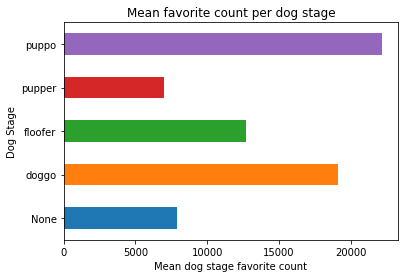

In [342]:
# Create a horizontal bar chart of the dog stage favorite count means
mean_dog_stage_favorites.plot(kind = 'barh')
plt.title('Mean favorite count per dog stage')
plt.xlabel('Mean dog stage favorite count')
plt.ylabel('Dog Stage')

#### Comment: No surprises here. Everybody loves puppies and their average favorite count is off the charts

### Q2-What are the top 10 dogs/accounts with the highest number of followers?

In [349]:
# Showing the 10 largest accounts by followers_count
top10_followers = df_twitter_final.nlargest(10, "followers_count")
top10_followers

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,prediction1,...,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count,followers_count,url
15,667544320556335104,2015-11-20 03:25:43,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",10,10,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,Pomeranian,...,Pembroke,0.312958,True,Chihuahua,0.071960,True,836.0,504.0,8681947.0,https://t.co/8zcwIoiuqR
743,668537837512433665,2015-11-22 21:13:35,This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba,8,10,Spark,None,https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg,1.0,Lakeland_terrier,...,toy_poodle,0.250445,True,Chihuahua,0.189737,True,245.0,69.0,8681945.0,https://t.co/stEodX9Aba
750,668625577880875008,2015-11-23 03:02:14,This is Maks. Maks just noticed something wasn't right. 10/10 https://t.co/0zBycaxyvs,10,10,Maks,None,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1.0,ox,...,groenendael,0.054455,True,Angora,0.045028,False,375.0,125.0,8681945.0,https://t.co/0zBycaxyvs
697,672488522314567680,2015-12-03 18:52:12,"This is Jackie. She was all ready to go out, but her friends just cancelled on her. 10/10 hang in there Jackie https://t.co/rVfi6CCidK",10,10,Jackie,None,https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg,1.0,Doberman,...,Rottweiler,0.108382,True,Appenzeller,0.077798,True,1085.0,424.0,8681942.0,https://t.co/rVfi6CCidK
859,677334615166730240,2015-12-17 03:48:51,This dog gave up mid jump. 9/10 https://t.co/KmMv3Y2zI8,9,10,None,None,https://pbs.twimg.com/media/CWZgPPUWUAAUOvu.jpg,2.0,Lakeland_terrier,...,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True,1344.0,282.0,8681942.0,https://t.co/KmMv3Y2zI8
1024,675145476954566656,2015-12-11 02:49:59,What an honor. 3 dogs here. Blond one is clearly a gymnast. Other two just confused. Very nifty pups. 9/10 for all https://t.co/YDgstgIDGs,9,10,None,None,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1.0,Labrador_retriever,...,Great_Dane,0.235504,True,Staffordshire_bullterrier,0.116864,True,2100.0,884.0,8681942.0,https://t.co/YDgstgIDGs
1768,680145970311643136,2015-12-24 22:00:10,Say hello to Kawhi. He was doing fine until his hat fell off. He got it back though. 10/10 deep breaths pupper https://t.co/N5pM6WBx7e,10,10,Kawhi,pupper,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,1.0,miniature_poodle,...,toy_poodle,0.226481,True,Maltese_dog,0.067682,True,3644.0,1750.0,8681942.0,https://t.co/N5pM6WBx7e
1969,673295268553605120,2015-12-06 00:17:55,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,8,10,Eve,pupper,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1.0,golden_retriever,...,Labrador_retriever,0.064683,True,Great_Pyrenees,0.012613,True,7347.0,3082.0,8681942.0,https://t.co/U36HYQIijg
594,671497587707535361,2015-12-01 01:14:35,This is Pip. He is a ship captain. Many years of experience sailing the treacherous open sea. 11/10 https://t.co/EY1uZJUGYJ,11,10,Pip,None,https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1.0,swing,...,paddle,0.080747,False,bathing_cap,0.065694,False,894.0,435.0,8681941.0,https://t.co/EY1uZJUGYJ
379,697943111201378304,2016-02-12 00:39:39,This is Cassie. She goes door to door trying to find the owner of this baguette. No luck so far. 10/10 https://t.co/e8bj97CisO,10,10,Cassie,None,https://pbs.twimg.com/media/Ca-XjfiUsAAUa8f.jpg,1.0,Great_Dane,...,Greater_Swiss_Mountain_dog,0.110037,True,German_short-haired_pointer,0.090816,True,2408.0,686.0,8681937.0,https://t.co/e8bj97CisO


#### Q3-Using the first prediction, what are the Top 10 accounts/tweets with the highest score (Score = rating_num / rating_denom)

In [369]:
# Creating a column score = rating_numerator / rating_denominator
df_twitter_final["score"] = df_twitter_final["rating_numerator"]/ df_twitter_final["rating_denominator"]

# Generate the top 10 dogs based on the score
top10_breeds_score = df_twitter_final.nlargest(10, "score")
top10_breeds_score

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,prediction1,...,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count,followers_count,url,score
1507,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,bow_tie,...,0.080822,False,sunglass,0.050776,False,5195.0,2488.0,8681285.0,https://t.co/GRXwMxLBkh,177.6
635,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10,None,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,microphone,...,0.094075,False,drumstick,0.061113,False,24007.0,8426.0,8681291.0,https://t.co/yfAAo1gdeY,42.0
1180,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,Logan,None,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,Pomeranian,...,0.122978,False,chow,0.102654,True,18769.0,6306.0,8681274.0,https://t.co/yBO5wuqaPS,7.5
1769,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,clumber,...,0.015950,True,Lhasa,0.006519,True,6717.0,1660.0,8681274.0,https://t.co/QFaUiIHxHq,2.7
891,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,None,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,kuvasz,...,0.111622,True,Great_Pyrenees,0.064061,True,1732.0,486.0,8681290.0,https://t.co/eNm2S6p9BD,2.6
147,878057613040115712,2017-06-23 01:10:23,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,14,10,Emmy,None,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1.0,French_bulldog,...,0.078799,True,toy_terrier,0.015243,True,39900.0,6280.0,8681275.0,https://t.co/cwtWnHMVpe,1.4
157,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14,10,None,None,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1.0,limousine,...,0.029175,False,shopping_cart,0.026321,False,43858.0,10834.0,8681275.0,https://t.co/20VrLAA8ba,1.4
202,884441805382717440,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",14,10,None,None,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1.0,Pembroke,...,0.003216,True,Chihuahua,0.002081,True,25610.0,5244.0,8681275.0,https://t.co/vvBOcC2VdC,1.4
1102,820314633777061888,2017-01-14 17:00:24,We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE,14,10,None,None,https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg,2.0,Gordon_setter,...,0.042041,True,Rottweiler,0.009417,True,3417.0,577.0,8681275.0,https://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE,1.4
1124,813812741911748608,2016-12-27 18:24:12,"Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg",14,10,Gary,None,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1.0,French_bulldog,...,0.247621,True,boxer,0.018855,True,37438.0,14418.0,8681274.0,https://t.co/uBnQTNEeGg,1.4


Text(0, 0.5, 'Mean Score')

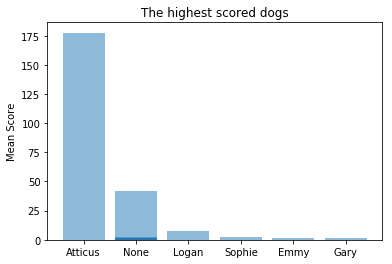

In [399]:
names = top10_breeds_score["name"].values.tolist()
average_scores = top10_breeds_score["score"].values.tolist()

plt.bar(names, average_scores, align="center", alpha=0.5)
plt.title("The highest scored dogs")
plt.ylabel("Mean Score")

#### Q4-What are the most frequent dog breeds?

In [397]:
df_twitter_final["prediction1"].value_counts().nlargest(5)

golden_retriever      138
Labrador_retriever    95 
Pembroke              88 
Chihuahua             79 
pug                   54 
Name: prediction1, dtype: int64

In [395]:
df_twitter_final["prediction2"].value_counts().nlargest(5)

Labrador_retriever          96
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
Name: prediction2, dtype: int64

In [396]:
df_twitter_final["prediction3"].value_counts().nlargest(5)

Labrador_retriever    75
Chihuahua             57
golden_retriever      46
Eskimo_dog            36
kelpie                33
Name: prediction3, dtype: int64

### Comments
It seems that golden retriever, labrador retriever and chihuahua lead the pack